In [1]:
import tensorflow as tf

In [2]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## A Simple classifier using keras's Sequential API

### Dataset MNIST

* Its a dataset of handwritten digits
* each data point it 2d array of 28x28
* It has 10 classes 0-9
* aka hello world for ANN

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [4]:
f_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = f_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [6]:
y_train_full.shape, y_train_full.dtype

((60000,), dtype('uint8'))

In [7]:
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [8]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [9]:
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

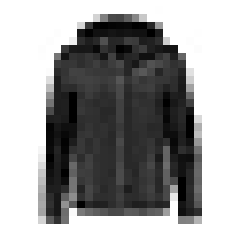

4

In [10]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()
y_train[0]

<AxesSubplot:>

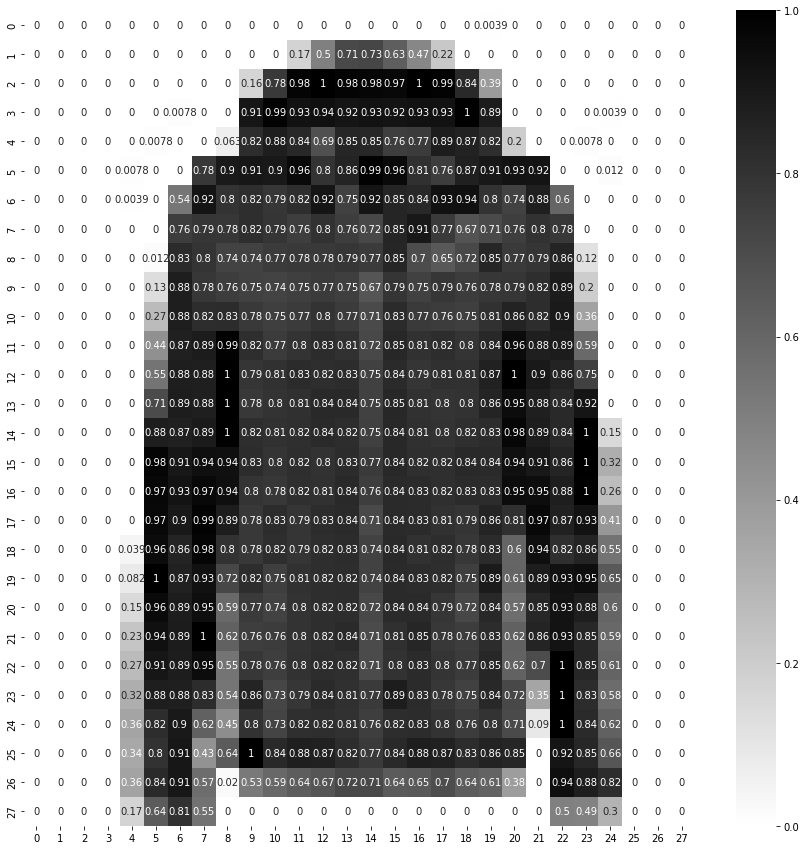

In [11]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [12]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]

In [13]:
model = tf.keras.models.Sequential(LAYERS)

In [14]:
model.layers

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10

(235500, 30100, 1010)

In [17]:
sum([784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10])

266610

In [18]:
hidden1 = model.layers[1]

model.get_layer(hidden1.name)

In [19]:
hidden1.get_weights()

[array([[-0.02263111,  0.05280089,  0.00119988, ..., -0.04640739,
         -0.03550503, -0.00719575],
        [-0.05864768,  0.01462128, -0.06546018, ..., -0.00843047,
          0.02277221,  0.0651859 ],
        [ 0.03008918, -0.01501876, -0.02135432, ..., -0.02166475,
          0.05634144, -0.06880047],
        ...,
        [ 0.02259474, -0.04503842,  0.01815014, ...,  0.00026748,
         -0.01824288,  0.01327785],
        [ 0.06242836, -0.00176674,  0.00626881, ..., -0.03220671,
          0.02371226,  0.03260101],
        [ 0.07379307,  0.03063516, -0.04028488, ..., -0.02946389,
          0.05574459,  0.06793652]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [20]:
weights, biases = hidden1.get_weights()

In [21]:
weights.shape

(784, 300)

In [22]:
biases.shape

(300,)

$loss\_function(actual, pred) = error$

In [23]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


### Important -

* **Epochs**: Integer. 
    
    Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. 

* **batch_size**: Integer or None. 
    
    Number of samples per gradient update. If unspecified, batch_size will default to 32. 
    
    *NOTE:* Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

* **validation_batch_size**: Integer or None. 

    Number of samples per validation batch. 
    
    If unspecified, will default to batch_size. 
    
    *NOTE:* Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/Model?hl=zh-tw#fit)

In [24]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 11s 4ms/step - loss: 0.7240 - accuracy: 0.7629 - val_loss: 0.5114 - val_accuracy: 0.8234
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4894 - accuracy: 0.8303 - val_loss: 0.4423 - val_accuracy: 0.8512
Epoch 3/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4447 - accuracy: 0.8440 - val_loss: 0.4308 - val_accuracy: 0.8548
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4178 - accuracy: 0.8525 - val_loss: 0.4069 - val_accuracy: 0.8628
Epoch 5/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3954 - accuracy: 0.8610 - val_loss: 0.3855 - val_accuracy: 0.8678


In [25]:
55000 / 16

3437.5

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4225 - accuracy: 0.8515


[0.4224550426006317, 0.8514999747276306]

In [27]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.724050,0.762891,0.511353,0.8234
1,0.489387,0.830327,0.442299,0.8512
2,0.444711,0.844036,0.430763,0.8548
3,0.417771,0.852473,0.406890,0.8628
4,0.395421,0.861036,0.385500,0.8678


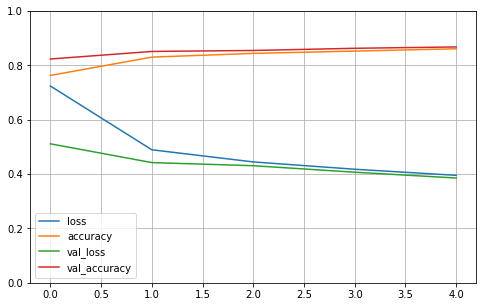

In [28]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## BN Approach one

In [29]:
del model

In [30]:
LAYER_BN_ONE = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]

In [31]:
model = tf.keras.models.Sequential(LAYER_BN_ONE)

In [32]:
model.layers

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [34]:
784 * 4, 300 * 4, 100 * 4

(3136, 1200, 400)

In [35]:
BN_params = sum([784 * 4, 300 * 4, 100 * 4])
BN_params

4736

In [36]:
Trainable_BN_params = sum([784 * 4, 300 * 4, 100 * 4])/2
Trainable_BN_params ## Gamma, Beta

2368.0

In [37]:
Non_Trainable_BN_params = BN_params - Trainable_BN_params
Non_Trainable_BN_params ## Mean, std deviation

2368.0

In [38]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [39]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 10s 5ms/step - loss: 0.5350 - accuracy: 0.8138 - val_loss: 0.3864 - val_accuracy: 0.8676
Epoch 2/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3930 - accuracy: 0.8602 - val_loss: 0.3577 - val_accuracy: 0.8776
Epoch 3/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3532 - accuracy: 0.8725 - val_loss: 0.3352 - val_accuracy: 0.8814
Epoch 4/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3262 - accuracy: 0.8814 - val_loss: 0.3260 - val_accuracy: 0.8822
Epoch 5/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3065 - accuracy: 0.8887 - val_loss: 0.3158 - val_accuracy: 0.8858


## BN Approach 2

In [40]:
del model

In [41]:
LAYER_BN_TWO = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.Dense(100, name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]

In [42]:
model = tf.keras.models.Sequential(LAYER_BN_TWO)

In [43]:
model.layers

In [44]:
BN_layer_1 = model.layers[1]
BN_layer_1

In [ ]:
for variable in BN_layer_1.variables:
  print(variable.name, variable.trainable)

batch_normalization_6/gamma:0 True
batch_normalization_6/beta:0 True
batch_normalization_6/moving_mean:0 False
batch_normalization_6/moving_variance:0 False


In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_4 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 hiddenLayer2 (Dense)        (None, 100)              

In [46]:
784 * 4, 300 * 4, 100 * 4

(3136, 1200, 400)

In [47]:
BN_params = sum([784 * 4, 300 * 4, 100 * 4])
BN_params

4736

In [48]:
Trainable_BN_params = sum([784 * 4, 300 * 4, 100 * 4])/2
Trainable_BN_params ## Gamma, Beta

2368.0

In [49]:
Non_Trainable_BN_params = BN_params - Trainable_BN_params
Non_Trainable_BN_params ## Mean, std deviation

2368.0

In [50]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [51]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 10s 5ms/step - loss: 0.5832 - accuracy: 0.8040 - val_loss: 0.3963 - val_accuracy: 0.8622
Epoch 2/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4134 - accuracy: 0.8545 - val_loss: 0.3553 - val_accuracy: 0.8744
Epoch 3/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3728 - accuracy: 0.8673 - val_loss: 0.3379 - val_accuracy: 0.8812
Epoch 4/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3420 - accuracy: 0.8782 - val_loss: 0.3267 - val_accuracy: 0.8816
Epoch 5/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3200 - accuracy: 0.8869 - val_loss: 0.3242 - val_accuracy: 0.8842
